In [1]:
import numpy as np
import matplotlib.pyplot as plt
import deepxde as dde 
from analytical import sound_hard_circle


#dde.config.set_default_float('float64')
#dde.config.set_default_float('float64')
dde.config.set_default_float('float32')


'''                        Problem parameters                               '''
k0 = 1           # wavenumber
# 5 is fine!
# 8 is more or less ok. ¿Add more points?
# Added more points, but not really ok with just 20.000 iterations + BFGS
# Change the learning rate? 
# Avec8 et 15 points, learning rate = 0.05, n'arrive pas a apprendre l'interieur...

wave_len = np.pi / k0  # wavelength

dim_x = 2 * np.pi

R = np.pi / 2.
n_wave = 10

# The mesh element size is h_elem
h_elem = wave_len / n_wave

nx = int(dim_x / h_elem)
print(h_elem, 'h_elem')
print( nx, 'nx')
print(nx **2, 'nx**2')

Using backend: tensorflow.compat.v1

2021-10-29 06:19:59.376843: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


Instructions for updating:
non-resource variables are not supported in the long term

Set the default float type to float32
0.3141592653589793 h_elem
20 nx
400 nx**2


In [2]:
#geom = dde.geometry.Rectangle([-dim_x/2., -dim_x/2.], [dim_x/2., dim_x/2.])

outer = dde.geometry.Rectangle([-dim_x/2., -dim_x/2.], [dim_x/2., dim_x/2.])
inner = dde.geometry.Disk([0,0], R)

geom = dde.geometry.CSGDifference(outer, inner)


In [3]:
x = geom.random_boundary_points(8 *nx)
xd = geom.random_points(nx ** 2)
normal = geom.boundary_normal(x)


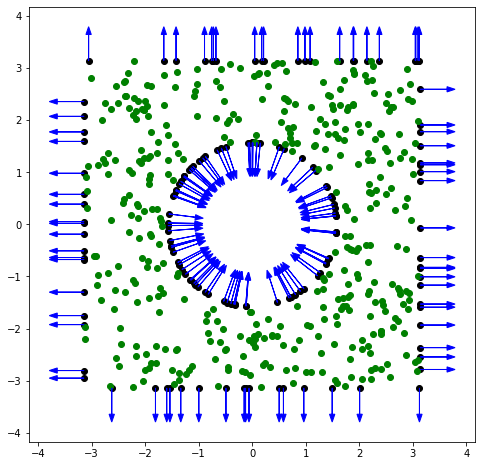

In [4]:
fig = plt.figure(figsize = (8,8))
plt.scatter(x[:,0], x[:,1], color = 'k')
plt.scatter(xd[:,0], xd[:,1], color = 'g')
npts = x.shape[0]

for i in range(npts):
    plt.arrow(x[i,0], x[i,1], 1/2*normal[i,0], 1/2*normal[i,1], color = 'b', head_width = .1)

Compiling model...
Building feed-forward neural network...
'build' took 0.060683 s



/opt/conda/envs/DL/lib/python3.9/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/opt/conda/envs/DL/lib/python3.9/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1692: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
2021-10-29 06:20:01.493915: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-10-29 06:20:01.596989: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: Quadro RTX 8000 computeCapability: 7.5
coreClock: 1.77GHz coreCount: 72 deviceMemorySize: 47.46GiB deviceMemoryBandwidth: 625.94GiB/s
2021-10-29 06:

'compile' took 1.201395 s

Initializing variables...
Training model...

Step      Train loss                                  Test loss                                   Test metric   
0         [1.12e-02, 1.21e-01, 5.53e-01, 6.43e-01]    [1.17e-02, 1.33e-01, 5.53e-01, 6.43e-01]    [1.15e+00]    


2021-10-29 06:20:02.691646: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 3000205000 Hz


1000      [3.63e-05, 3.30e-05, 8.67e-06, 6.86e-06]    [3.17e-05, 3.32e-05, 8.67e-06, 6.86e-06]    [3.67e-03]    
2000      [1.80e-05, 8.64e-06, 5.47e-06, 3.17e-06]    [1.91e-05, 9.17e-06, 5.47e-06, 3.17e-06]    [2.56e-03]    
3000      [2.06e-04, 6.03e-04, 4.29e-05, 7.44e-04]    [1.95e-04, 6.55e-04, 4.29e-05, 7.44e-04]    [2.51e-02]    
4000      [8.51e-06, 9.51e-06, 3.24e-06, 8.32e-06]    [9.35e-06, 1.09e-05, 3.24e-06, 8.32e-06]    [3.25e-03]    
5000      [9.00e-05, 1.99e-04, 3.99e-05, 2.21e-04]    [7.72e-05, 2.06e-04, 3.99e-05, 2.21e-04]    [1.50e-02]    
6000      [1.36e-04, 1.68e-04, 1.38e-04, 2.40e-04]    [1.28e-04, 1.82e-04, 1.38e-04, 2.40e-04]    [1.98e-02]    
7000      [2.84e-05, 8.12e-05, 1.60e-05, 8.86e-05]    [3.27e-05, 8.90e-05, 1.60e-05, 8.86e-05]    [1.00e-02]    
8000      [5.30e-04, 4.49e-04, 8.43e-04, 6.65e-04]    [4.78e-04, 4.72e-04, 8.43e-04, 6.65e-04]    [3.94e-02]    
9000      [5.56e-04, 5.37e-04, 1.07e-04, 6.73e-04]    [5.19e-04, 5.97e-04, 1.07e-04, 6.73e-04]  

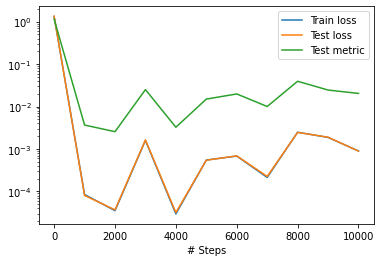

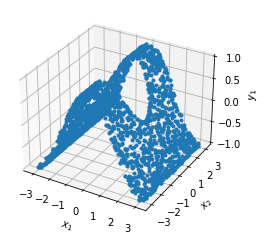

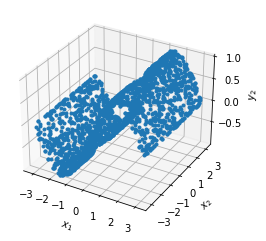

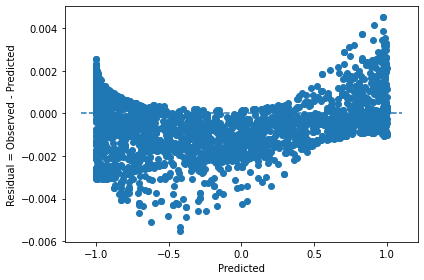

In [5]:
#geom = dde.geometry.Rectangle([-dim_x/2., -dim_x/2.], [dim_x/2., dim_x/2.])

outer = dde.geometry.Rectangle([-dim_x/2., -dim_x/2.], [dim_x/2., dim_x/2.])
inner = dde.geometry.Disk([0,0], R)

geom = dde.geometry.CSGDifference(outer, inner)

def pde(x, y):
    y0, y1 = y[:, 0:1], y[:, 1:2]
    
    y0_xx = dde.grad.hessian(y, x, component=0, i=0, j=0)
    y0_yy = dde.grad.hessian(y, x, component=0, i=1, j=1)

    y1_xx = dde.grad.hessian(y, x,component=1, i=0, j=0)
    y1_yy = dde.grad.hessian(y, x,component=1, i=1, j=1)

    return [-y0_xx - y0_yy - k0 ** 2 * y0,
            -y1_xx - y1_yy - k0 ** 2 * y1]

def sol(x):
    return np.exp(1j * k0 * x[:, 0:1])

def boundary(_, on_boundary):
    return on_boundary

def boundary_outer(_, on_boundary):
    return on_boundary and outer.on_boundary(_)

def boundary_inner(_, on_boundary):
    return on_boundary and inner.on_boundary(_)

def func0(x):
    result = np.exp(1j * k0 * x[:, 0:1])
    return np.real(result)

def func1(x):
    result = np.exp(1j * k0 * x[:, 0:1])
    return np.imag(result)

#bc0_inner = dde.DirichletBC(geom, func0, boundary_inner, component = 0)
bc0 = dde.DirichletBC(geom, func0, boundary, component = 0)
bc1 = dde.DirichletBC(geom, func1, boundary, component = 1)
#bc1_inner = dde.DirichletBC(geom, func1, boundary_inner, component = 0)

#bc0_outer = dde.DirichletBC(geom, func0, boundary_outer, component = 1)
#bc1_outer = dde.DirichletBC(geom, func1, boundary_outer, component = 1)


def func(x):
    real = np.real(np.exp(1j * k0 * x[:, 0:1]))
    imag = np.imag(np.exp(1j * k0 * x[:, 0:1]))
    return np.hstack((real, imag))

bcs = [bc0, bc1]
#weights = [1, 1, 100, 100, 100, 100]
weights = [1, 1, 1, 1]


data = dde.data.PDE(geom, pde, bcs, num_domain= nx**2, num_boundary= 8 * nx, num_test= 5 * nx ** 2, solution = func)
net = dde.maps.FNN([2] + [100] * 6 + [2], "tanh", "Glorot uniform")
model = dde.Model(data, net)

model.compile("adam", lr=0.001, loss_weights= weights, metrics=["l2 relative error"])
losshistory, train_state = model.train(epochs=10000)

dde.saveplot(losshistory, train_state, issave=True, isplot=True)

#model.compile("L-BFGS")
#losshistory, train_state = model.train()

Relative error =  0.01984866574751506


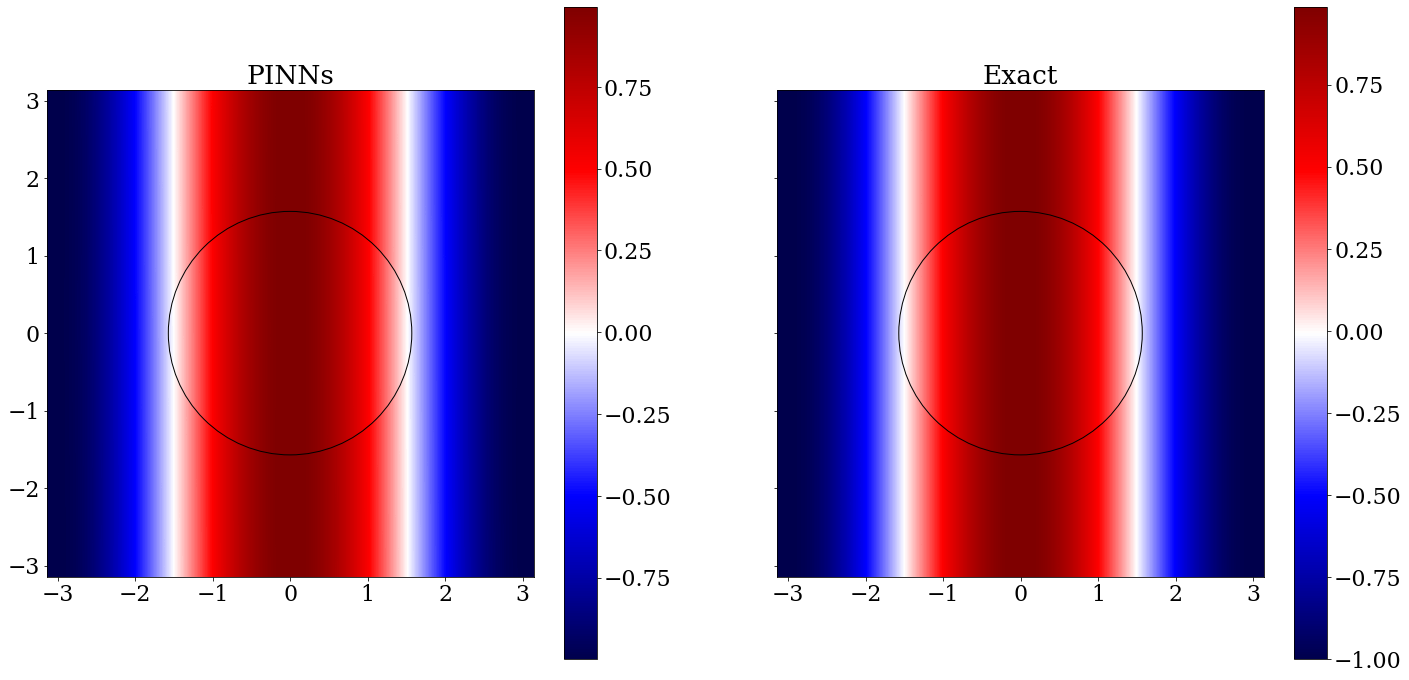

In [7]:

'''            Evaluate field over a specified grid of points              '''
# Square grid with 10 points per wavelength in each direction
Nx = int(np.ceil(dim_x/wave_len * 10))
Ny = Nx


# Grid points
xmin, xmax, ymin, ymax = [-dim_x/2, dim_x/2., -dim_x/2, dim_x/2]
plot_grid = np.mgrid[xmin:xmax:Nx * 1j, ymin:ymax:Ny * 1j]
points = np.vstack((plot_grid[0].ravel(),
                    plot_grid[1].ravel(),
                    np.zeros(plot_grid[0].size)))

points_2d = points[:2, :]

#in_circ = points[0, :]**2 + points[1, :]**2 <= (radius)**2
#in_circ_2d = points_2d[0, :]**2 + points_2d[1, :]**2 <= (radius)**2
#points[0, in_circ] = -radius - wave_len / 10
#points[1, in_circ] = radius + wave_len / 10
#points[2, in_circ] = 0.

# Bounding box tree etc for function evaluations

u_sca = model.predict(points[:2, :].T)
u_sca = u_sca[:, 0] + 1j* u_sca[:, 1]
u_sca = u_sca.reshape((Nx, Ny))

'''                  Compare against analytical solution                    '''
# Uncomment to perform comparison, takes a few seconds to run

u_exact = sol(points.T)
u_exact = u_exact.reshape((Nx, Ny))
diff = u_exact-u_sca
error = np.linalg.norm(diff)/np.linalg.norm(u_exact)
print('Relative error = ', error)

'''                     Plot field and save figure                          '''
plt.rc('font', family='serif', size=22)

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize = (24,12))

pcm = ax1.imshow(np.fliplr(np.real(u_sca)).T,
           extent=[-dim_x/2, dim_x/2., -dim_x/2, dim_x/2],
           cmap=plt.cm.get_cmap('seismic'), interpolation='spline16', label='PINN')

circle = plt.Circle((0., 0.), R, color='black', fill=False)
ax1.add_patch(circle)
#ax1.axis('off')
fig.colorbar(pcm, ax = ax1)

pcm = ax2.imshow(np.fliplr(np.real(u_exact)).T,
           extent=[-dim_x/2, dim_x/2., -dim_x/2, dim_x/2],
           cmap=plt.cm.get_cmap('seismic'), interpolation='spline16', label = 'Exact')

circle = plt.Circle((0., 0.), R, color='black', fill=False)
ax2.add_patch(circle)

#ax1.axis('off')
ax1.set_title('PINNs')
ax2.set_title('Exact')
fig.colorbar(pcm, ax = ax2)


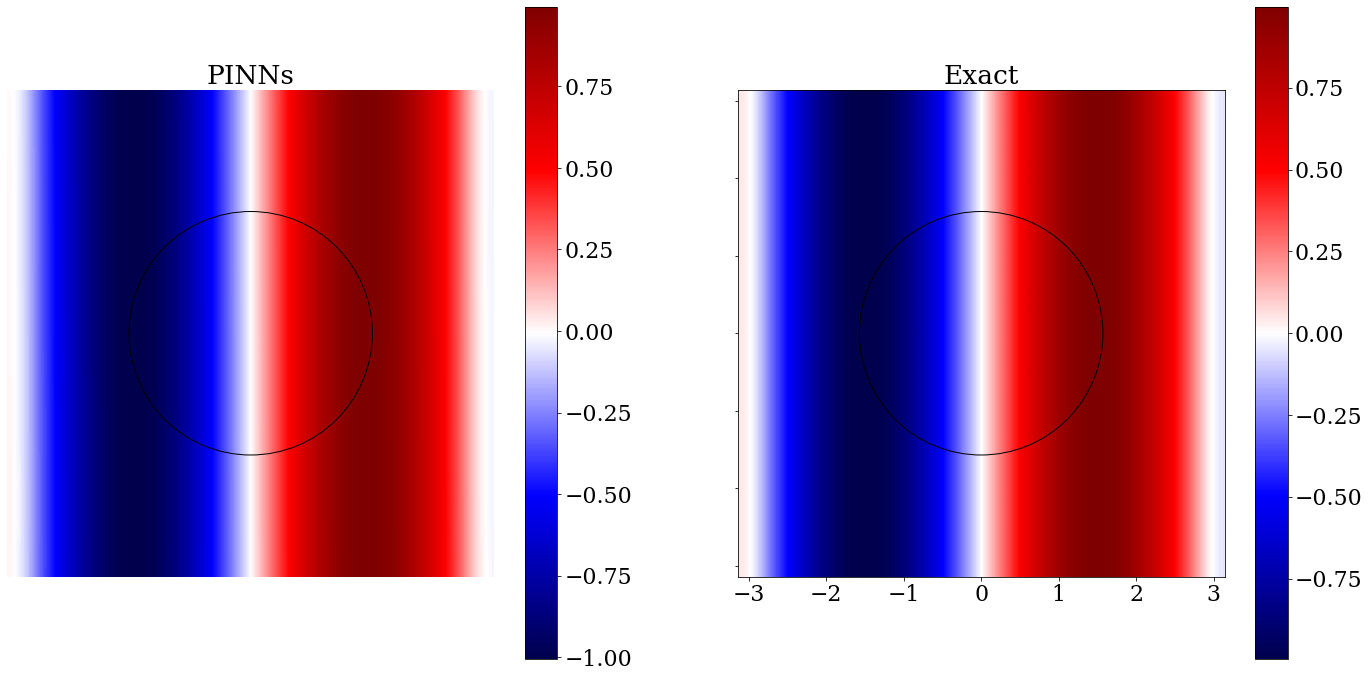

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize = (24,12))

pcm = ax1.imshow(np.fliplr(np.imag(u_sca)).T,
           extent=[-dim_x/2,dim_x/2.,-dim_x/2,dim_x/2],
           cmap=plt.cm.get_cmap('seismic'), interpolation='spline16', label='PINN')


ax1.axis('off')
circle = plt.Circle((0., 0.), R, color='black', fill=False)
ax1.add_patch(circle)
fig.colorbar(pcm, ax = ax1)

pcm = ax2.imshow(np.fliplr(np.imag(u_exact)).T,
           extent = [-dim_x/2,dim_x/2.,-dim_x/2,dim_x/2],
           cmap=plt.cm.get_cmap('seismic'), interpolation='spline16', label = 'Exact')

circle = plt.Circle((0., 0.), R, color='black', fill=False)
ax2.add_patch(circle)


#ax1.axis('off')
ax1.set_title('PINNs')
ax2.set_title('Exact')
fig.colorbar(pcm, ax = ax2)
